In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
from sklearn.neighbors import NearestNeighbors
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [4]:
df1=pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [4]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df1=df1.rename(columns={'movie_id':'id'})
df1.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [6]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Since both the datast a columns in common it can be merged to form a single dataframe
after merging the dataframe there are two attribute "id" one of them had to be dropped.


In [6]:
df_new=df2.merge(df1,on=['id','title'])
df_new.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### There are 3 types filtering for recommendation system.
#### 1.Demographic Filtering : Based on rating and popularity.
#### 2.Content Based Filtering : Based on the type of genre and theme of the movie.
#### 3.Collabrative Filtering : It takes users interest into consideration and recommend movies to user with similar interest.

# 1.Demographic Filtering.

In [9]:
data_demo=df_new[['title','vote_average','popularity','vote_count']]
data_demo.head()

,title,vote_average,popularity,vote_count
0,Avatar,7.2,150.437577,11800
1,Pirates of the Caribbean: At World's End,6.9,139.082615,4500
2,Spectre,6.3,107.376788,4466
3,The Dark Knight Rises,7.6,112.312950,9106
4,John Carter,6.1,43.926995,2124


In [10]:
data_demo.isnull().sum()

title           0
vote_average    0
popularity      0
vote_count      0
dtype: int64

In [11]:
data_demo.describe()

,vote_average,popularity,vote_count
count,4803.000000,4803.000000,4803.000000
mean,6.092172,21.492301,690.217989
std,1.194612,31.816650,1234.585891
min,0.000000,0.000000,0.000000
25%,5.600000,4.668070,54.000000
50%,6.200000,12.921594,235.000000
75%,6.800000,28.313505,737.000000
max,10.000000,875.581305,13752.000000


## Formula:
## W =  (R.v + C.m)/(v+m)
#### where:
#### W is the weighted rating;
#### R is the mean rating for the movie
#### v is the number of votes for the movie;
#### m is the minimum votes required to be listed.
#### C is the mean vote across the whole report

In [12]:
R=data_demo['vote_average']
v=data_demo['vote_count']
m=data_demo['vote_count'].quantile(.70)
C=data_demo['vote_average'].mean()

In [13]:
data_demo['Weighted_rating']=((R*v) + (C*m))/(v+m)

/tmp/ipykernel_33/2686573831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_demo['Weighted_rating']=((R*v) + (C*m))/(v+m)


In [14]:
data_demo=data_demo.sort_values('Weighted_rating',ascending=False)
data_demo.reset_index(inplace=True)


In [15]:
data_demo.drop(columns=['index'],axis=1,inplace=True)

In [16]:
data_demo.tail(5)

,title,vote_average,popularity,vote_count,Weighted_rating
4798,Catwoman,4.2,32.271938,808,4.991470
4799,The Boy Next Door,4.1,24.161735,1022,4.822053
4800,Batman & Robin,4.2,50.073575,1418,4.749951
4801,Fantastic Four,4.4,38.126095,2278,4.743880
4802,Dragonball Evolution,2.9,21.677732,462,4.678190


In [17]:
def recommend(data,name):
    index=data[data['title']==name].index[0]
    if (index + 5 > len(data)):
        movie_list=data['title'].loc[index-6:index-1].tolist()
    else:
        movie_list=data['title'].loc[index+1:index +5].tolist()
    for i in movie_list:
        print(i)

### This function recommend movies based on the weighted ratings.

In [18]:
recommend(data_demo,'The Dark Knight')

Forrest Gump
Schindler's List
Whiplash
Inception
The Empire Strikes Back


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'The Shawshank Redemption'),
  Text(1, 0, 'The Godfather'),
  Text(2, 0, 'Fight Club'),
  Text(3, 0, 'Pulp Fiction'),
  Text(4, 0, 'The Dark Knight'),
  Text(5, 0, 'Forrest Gump'),
  Text(6, 0, "Schindler's List"),
  Text(7, 0, 'Whiplash'),
  Text(8, 0, 'Inception'),
  Text(9, 0, 'The Empire Strikes Back')])

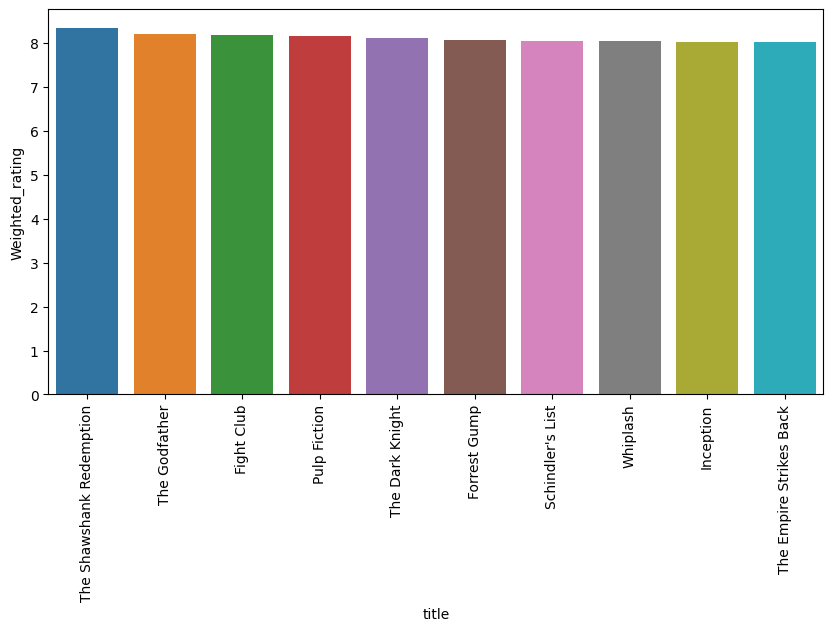

In [19]:
plt.figure(figsize=(10,5))
c1=sns.barplot(x=data_demo['title'].head(10),y=data_demo['Weighted_rating'].head(10))
plt.xticks(rotation=90)

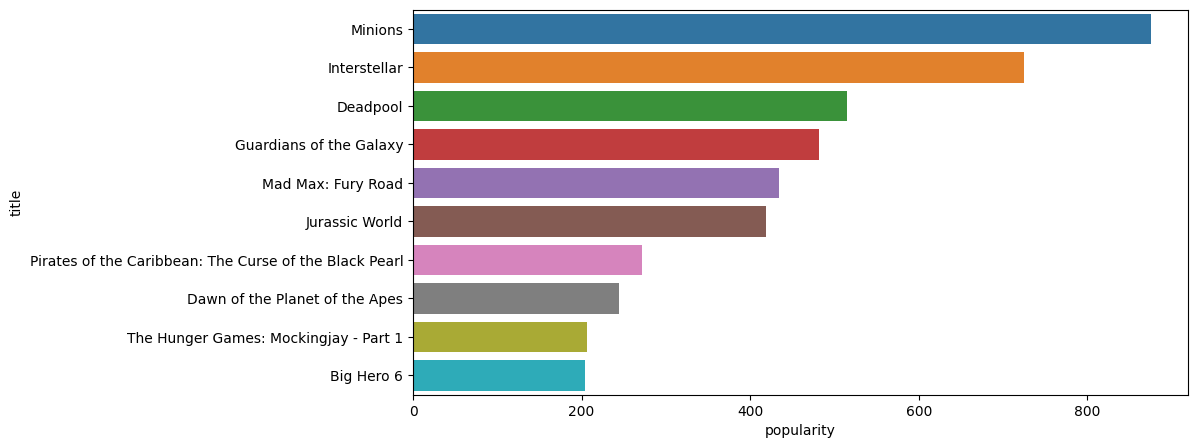

In [20]:
popularity=data_demo.sort_values('popularity',ascending=False)
plt.figure(figsize=(10,5))
x1=sns.barplot(x=popularity['popularity'].head(10),y=popularity['title'].head(10))

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data_demo[['popularity','Weighted_rating']])

In [22]:
scaled_df=pd.DataFrame(scaled_data,columns=['popularity','Weighted_rating'])

In [23]:
data_demo['Score']=(scaled_df['popularity']* 0.65) + (scaled_df['Weighted_rating']* 0.35)

In [24]:
movie_score=data_demo.sort_values('Score',ascending=False)

In [25]:
movie_score.reset_index(drop=True,inplace=True)

In [26]:
movie_score

,title,vote_average,popularity,vote_count,Weighted_rating,Score
0,Interstellar,8.1,724.247784,10867,7.998100,0.854909
1,Minions,6.4,875.581305,4571,6.365286,0.811220
2,Guardians of the Galaxy,7.9,481.098624,9742,7.798252,0.655306
3,Deadpool,7.4,514.569956,10995,7.334360,0.635824
4,Mad Max: Fury Road,7.2,434.278564,9427,7.135687,0.557233
...,...,...,...,...,...,...
4798,Batman & Robin,4.2,50.073575,1418,4.749951,0.044030
4799,Epic Movie,3.2,6.064638,326,5.052648,0.040286
4800,Fantastic Four,4.4,38.126095,2278,4.743880,0.034581
4801,The Boy Next Door,4.1,24.161735,1022,4.822053,0.031685


In [27]:
def recommend_score(data,name):
    index=data[data['title']==name].index[0]
    if (index + 5 > len(data)):
        movie_list=data['title'].loc[index-6:index-1].tolist()
    else:
        movie_list=data['title'].loc[index+1:index +5].tolist()
    for i in movie_list:
        print(i)

In [28]:
recommend_score(movie_score,'The Dark Knight')

Whiplash
Pirates of the Caribbean: The Curse of the Black Pearl
The Shawshank Redemption
Inception
Fight Club


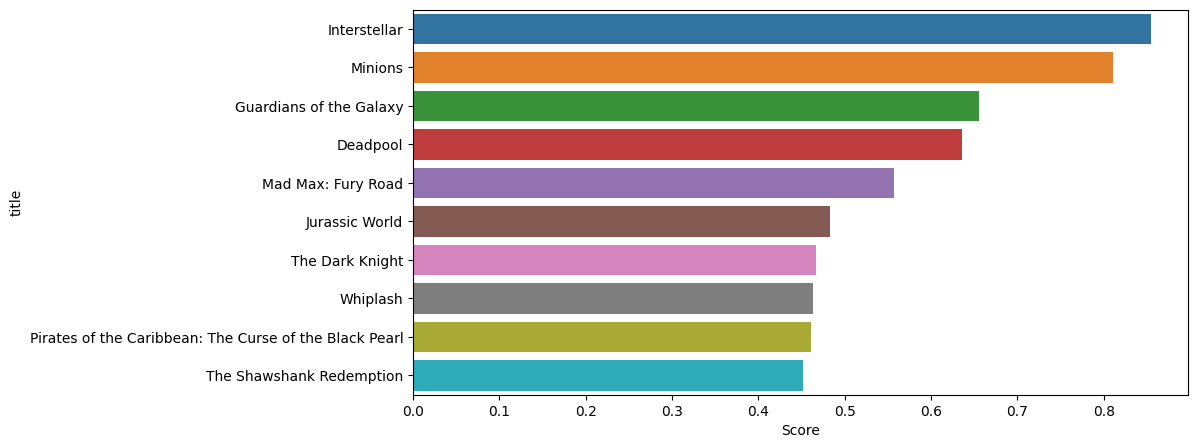

In [29]:
#popularity=data_demo.sort_values('popularity',ascending=False)
plt.figure(figsize=(10,5))
x1=sns.barplot(x=movie_score['Score'].head(10),y=movie_score['title'].head(10))

In [51]:
def knrecom(data,name,n_neighbors=6):
    if name not in data['title'].values :
        print('Title not present')
        return
    index=data[data['title']==name].index[0]
    scores=data.loc[index,'Score']
    feature=data[['Score']]
    knn=NearestNeighbors(n_neighbors=n_neighbors+1)
    knn.fit(feature)
    new_d = pd.DataFrame([[scores]], columns=['Score'])
    distance,index=knn.kneighbors(new_d)
    similar_index=index[0][1:]
    similar_movies=data.iloc[similar_index]['title'].tolist()
    for mov in similar_movies:
        print(mov)

In [52]:
knrecom(movie_score,'Interstellar')

Minions
Guardians of the Galaxy
Deadpool
Mad Max: Fury Road
Jurassic World
The Dark Knight


# Content Based Filtering.

In [7]:
movie_cb=df_new.copy()

In [6]:
movie_cb.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [11]:
movie_cb.shape

(4803, 22)

In [83]:
dfn=movie_cb[['id','title','genres','cast','overview','keywords','crew','production_companies']].copy()

In [85]:
dfn.dropna(inplace=True)

In [56]:
df.shape

(4800, 8)

In [79]:
df.head()

,id,title,genres,cast,overview,keywords,crew,production_companies
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war]",[James Cameron],"[Ingenious Film Partners, Twentieth Century Fo..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island]",[Gore Verbinski],"[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,206647,Spectre,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent]",[Sam Mendes],"[Columbia Pictures, Danjaq, B24]"
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist]",[Christopher Nolan],"[Legendary Pictures, Warner Bros., DC Entertai..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion]",[Andrew Stanton],[Walt Disney Pictures]


In [86]:

def imp(obj):
    note=[]
    for i in literal_eval(obj):
        note.append(i['name'])
    if  len(note) > 4:
        note=note[:4]
        
    return note

In [88]:
attr=['genres','cast','keywords','production_companies']
for i in attr:
    dfn[i]=dfn[i].apply(imp)

In [89]:
def director(obj):
    name=[]
    for i in literal_eval(obj):
        if i['job']=='Director':
            name.append(i['name'])
    return name      

In [90]:
dfn['crew']=dfn['crew'].apply(director)

In [91]:
dfn['overview']=dfn['overview'].apply(lambda x : x.split())

In [107]:
dfn.head()

,id,title,genres,cast,overview,keywords,crew,production_companies,Req
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony]",[JamesCameron],"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[Action, Adventure, Fantasy, ScienceFiction, S..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...",[GoreVerbinski],"[WaltDisneyPictures, JerryBruckheimerFilms, Se...","[Adventure, Fantasy, Action, JohnnyDepp, Orlan..."
2,206647,Spectre,"[Action, Adventure, Crime]","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel]",[SamMendes],"[ColumbiaPictures, Danjaq, B24]","[Action, Adventure, Crime, DanielCraig, Christ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[ChristianBale, MichaelCaine, GaryOldman, Anne...","[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...",[ChristopherNolan],"[LegendaryPictures, WarnerBros., DCEntertainme...","[Action, Crime, Drama, Thriller, ChristianBale..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...","[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel]",[AndrewStanton],[WaltDisneyPictures],"[Action, Adventure, ScienceFiction, TaylorKits..."


In [100]:
attr=['genres','cast','keywords','production_companies','crew']
for i in attr:
    dfn[i]=dfn[i].apply(lambda x :[i.replace(" ","") for i in x])

In [103]:
dfn['Req']=dfn['genres']+dfn['cast']+dfn['crew']+dfn['overview']+dfn['keywords']+dfn['production_companies']

In [140]:
df3=dfn[['id','title','Req']].copy()

In [142]:
df3['Req']=df3['Req'].apply(lambda x: " ".join(x))
df3['Req']=df3['Req'].apply(lambda x : x.lower())

In [143]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [144]:
def stmming(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y) 

In [146]:
df3['Req']=df3['Req'].apply(stmming)

In [147]:
CV=CountVectorizer(max_features=8000,stop_words='english')

In [148]:
vect=CV.fit_transform(df3['Req']).

In [158]:
movie_similar=cosine_similarity(vect)

In [254]:
def recommend_movie(data,title):
    if title not in data['title'].values:
        print('Movie name did not match')
        return
    else:
        index=data[data['title']==title].index[0]
        score=movie_similar[index]
        score=sorted(list(enumerate(score)),reverse=True,key=lambda x:x[1])[1:6]
        #ind=[]
        #for i,sc in score:
        #    if len(ind) < 5:
        #       ind.append(i)
        for i in score:                        
            movie=data.iloc[i[0]].title
            print(movie)
        

In [256]:
recommend_movie(df3,'John Carter')

Krrish
The Other Side of Heaven
The Legend of Hercules
Get Carter
King's Ransom


In [259]:
import pickle
pickle.dump(df3.to_dict(),open('movie_dict.pkl',"wb"))

In [260]:
pickle.dump(movie_similar,open('similar.pkl','wb'))